In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
articles = pd.read_csv("../../build/articles2.csv")
universities_df = pd.read_csv('../../build/universities.csv')
professors_df = pd.read_csv('../../build/professors.csv')
articles.dropna(inplace=True)

In [20]:
articles

,title,GS_link,year,cite,main_authors,more_info,link_ids_x,llama_subjects
0,Timing of surgery following SARS‐CoV‐2 infecti...,/citations?view_op=view_citation&hl=en&user=_C...,2021,382,"COVIDSurg Collaborative, GlobalSurg Collaborat...","Anaesthesia 76 (6), 748-758, 2021","55,0,116","['Medicine', 'Health Professions', 'Pharmacolo..."
1,Timing of surgery following SARS‐CoV‐2 infecti...,/citations?view_op=view_citation&hl=en&user=_C...,2021,382,"COVIDSurg Collaborative, GlobalSurg Collaborat...","Anaesthesia 76 (6), 748-758, 2021","55,0,116","['Medicine', 'Health Professions', 'Immunology..."
2,SARS-CoV-2 infection and venous thromboembolis...,/citations?view_op=view_citation&hl=en&user=_C...,2022,48,"C COVIDSurg, C GlobalSurg","Anaesthesia 77 (1), 28-39, 2022","0,116","['Medicine', 'Health Professions', 'Immunology..."
3,Effects of pre‐operative isolation on postoper...,/citations?view_op=view_citation&hl=en&user=_C...,2021,24,"COVIDSurg Collaborative, GlobalSurg Collaborat...","Anaesthesia 76 (11), 1454-1464, 2021","55,0,116","['Health Professions', 'Medicine', 'Nursing']"
4,Measurements of the ...,/citations?view_op=view_citation&hl=en&user=_C...,2021,2,"V Khachatryan, AM Sirunyan, A Tumasyan, W Adam...","Springer Nature, 2021","0,34234,5600","['Engineering', 'Environmental Science', 'Phys..."
...,...,...,...,...,...,...,...,...
187205,A new thermal conductivity model of CNTs/C2H6O...,/citations?view_op=view_citation&hl=en&user=2G...,2022,26,"AH Ghobadi, M Armin, SG Hassankolaei, M Gholin...",International Journal of Ambient Energy 43 (1)...,49374,"['Engineering', 'Chemistry', 'Materials Science']"
187206,"Thermofluids analysis of combustion, emissions...",/citations?view_op=view_citation&hl=en&user=2G...,2022,4,"R Madihi, M Pourfallah, M Gholinia, M Armin, A...","International Journal of Thermofluids 16, 1002...",49374,"['Energy', 'Engineering', 'Chemical Engineering']"
187207,"Comparative evaluation of energy, performance,...",/citations?view_op=view_citation&hl=en&user=2G...,2022,2,"M Armin, M Gholinia","Results in Engineering 16, 100766, 2022",49374,"['Energy', 'Engineering', 'Environmental Scien..."
187208,Manage transportation planning based on big da...,/citations?view_op=view_citation&hl=en&user=nZ...,2020,0,"IM K Akbarian, H Mirzagoltabar",16th International Conference on Industrial En...,49376,"['Computer Science', 'Business, Management and..."


In [21]:
import ast
articles.llama_subjects = articles.llama_subjects.apply(ast.literal_eval)

In [22]:
candidate_labels = [
    "Agricultural and Biological Sciences", "Arts and Humanities", "Biochemistry, Genetics and Molecular Biology",
    "Business, Management and Accounting", "Chemical Engineering", "Chemistry", "Computer Science",
    "Decision Sciences", "Dentistry", "Earth and Planetary Sciences", "Economics, Econometrics and Finance",
    "Energy", "Environmental Science", "Immunology and Microbiology",
    "Materials Science", "Mathematics", "Medicine", "Neuroscience", "Nursing",
    "Pharmacology, Toxicology and Pharmaceutics", "Physics and Astronomy", "Psychology", "Social Sciences",
    "Veterinary", "Biological and Agricultural Sciences"
]


def assign_closest(x):
    x_copy = x.copy()
    for i in x:
        if i not in candidate_labels:
            x_copy.remove(i)
    if x_copy:
        if x_copy[0] == "Biological and Agricultural Sciences":
            return "Agricultural and Biological Sciences"
        return x_copy[0]

articles["main_subject"] = articles.llama_subjects.apply(assign_closest)
articles.drop(columns=["llama_subjects"], inplace=True)

In [23]:
articles.dropna(inplace=True)

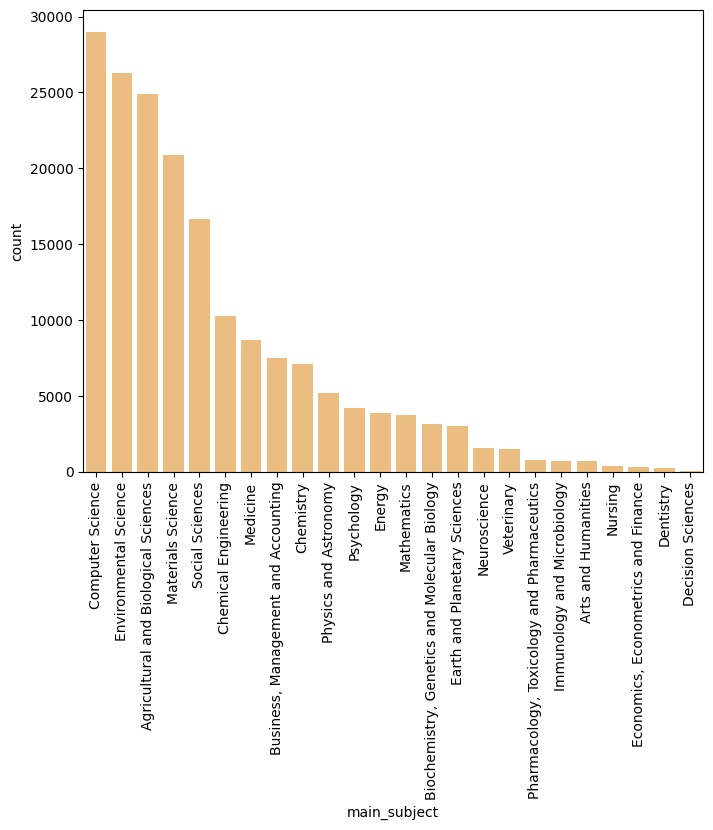

In [24]:
sorted_order = articles['main_subject'].value_counts().index


plt.figure(figsize=(8, 6))
sns.countplot(articles, x="main_subject", order=sorted_order,  color=sns.color_palette("Paired")[6])
plt.xticks(rotation=90);

/tmp/ipykernel_23388/1348590583.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette='coolwarm')


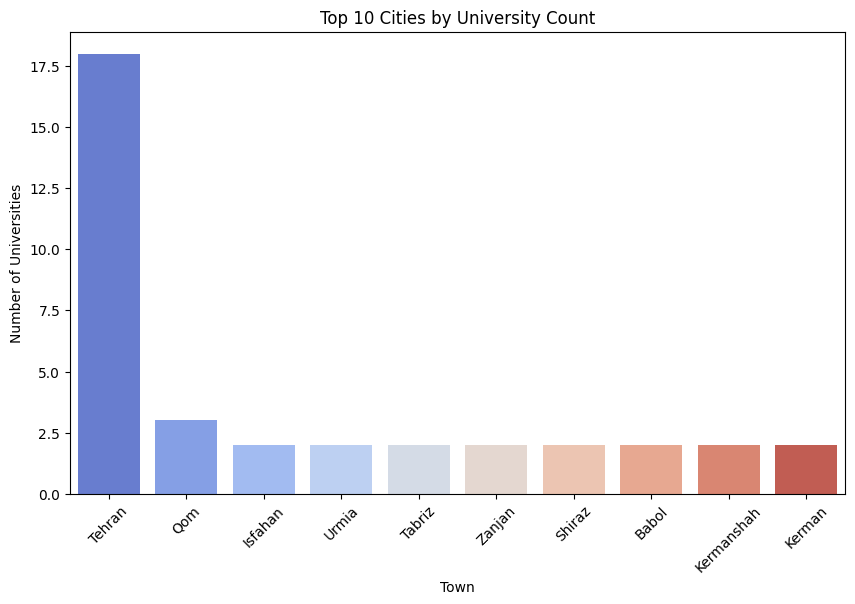

In [25]:
# Count universities by city
city_counts = universities_df['Town'].value_counts().head(10)  # Top 10 cities

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=city_counts.index, y=city_counts.values, palette='coolwarm')
plt.title('Top 10 Cities by University Count')
plt.ylabel('Number of Universities')
plt.xticks(rotation=45)
plt.show()


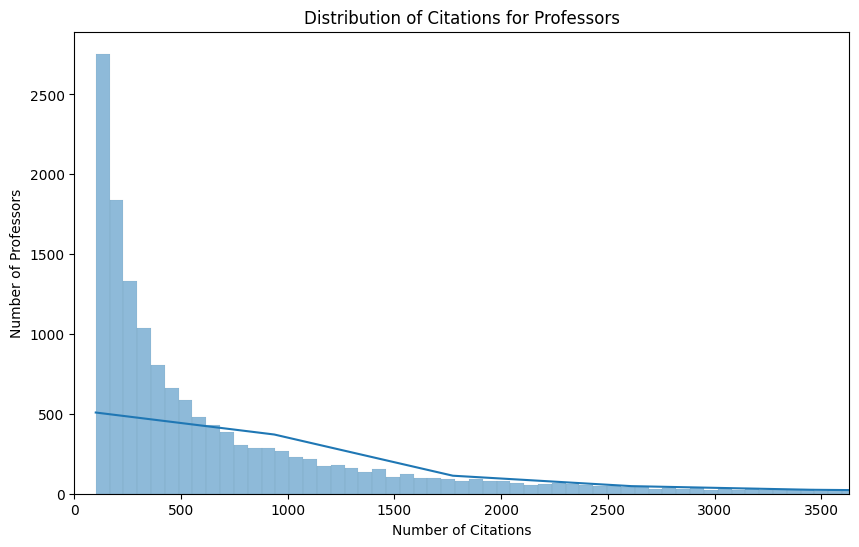

In [26]:
# Plot citation distribution
plt.figure(figsize=(10, 6))
sns.histplot(professors_df['cited_by'], kde=True)
plt.title('Distribution of Citations for Professors')
plt.xlabel('Number of Citations')
plt.ylabel('Number of Professors')
plt.xlim(0, professors_df['cited_by'].quantile(0.95))  # Limit x-axis to the 95th percentile
plt.show()


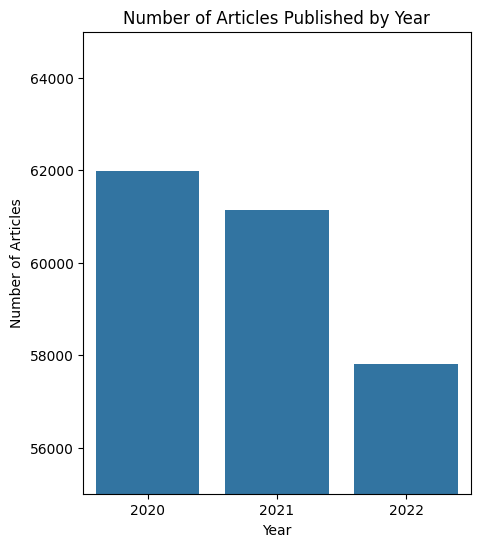

In [27]:
# Group articles by year
articles_per_year = articles.groupby('year')['title'].count()

# Plot
plt.figure(figsize=(5, 6))
sns.barplot(x=articles_per_year.index, y=articles_per_year.values)
plt.title('Number of Articles Published by Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.ylim(55_000,65_000)
plt.show()


Text(0, 0.5, 'Number of Subjects')

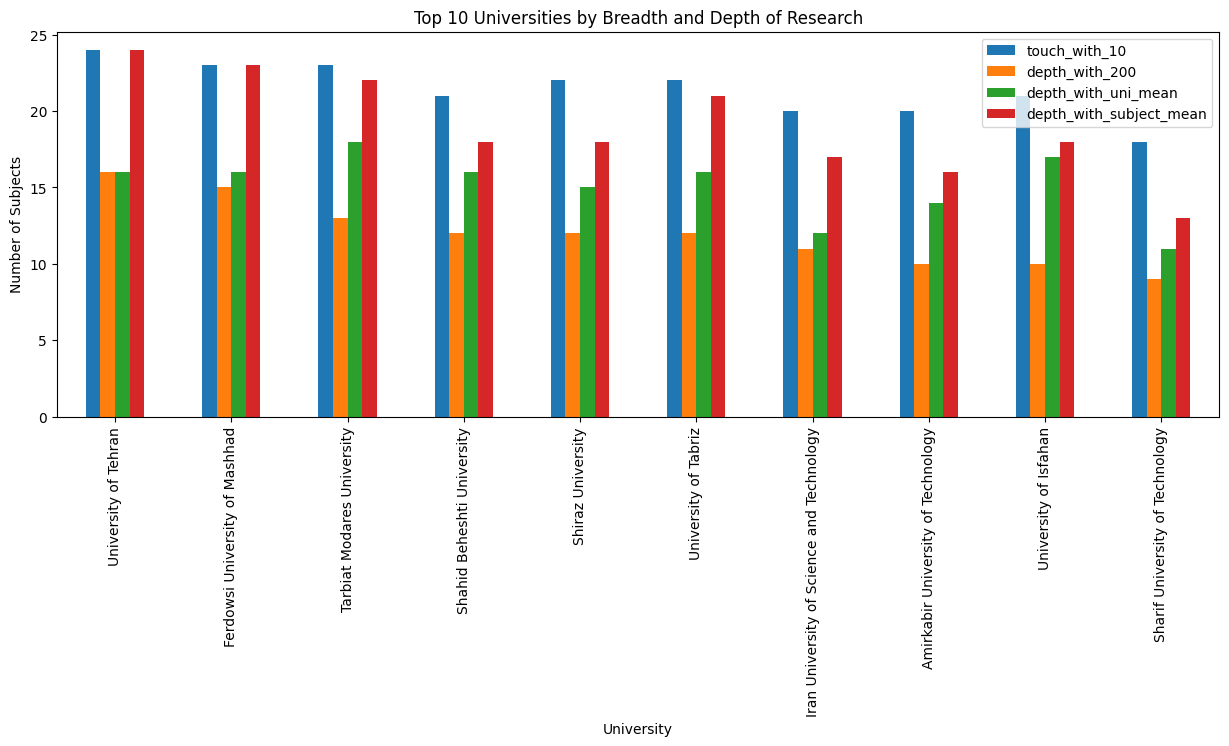

In [28]:
# Extract depth and breadth metrics
breadth_df = universities_df[['University', 'touch_with_10', 'depth_with_200', "depth_with_uni_mean", "depth_with_subject_mean"]].sort_values(by='depth_with_200', ascending=False).head(10)

# Plot breadth and depth
fig, ax = plt.subplots(figsize=(15,5))
breadth_df.set_index('University').plot(kind='bar', stacked=False, ax=ax, rot=90)
ax.set_title('Top 10 Universities by Breadth and Depth of Research')
ax.set_ylabel('Number of Subjects')

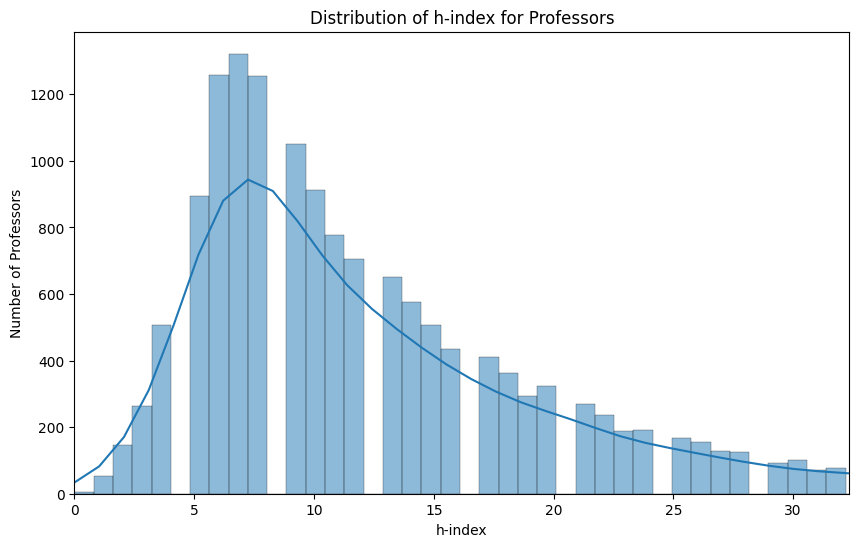

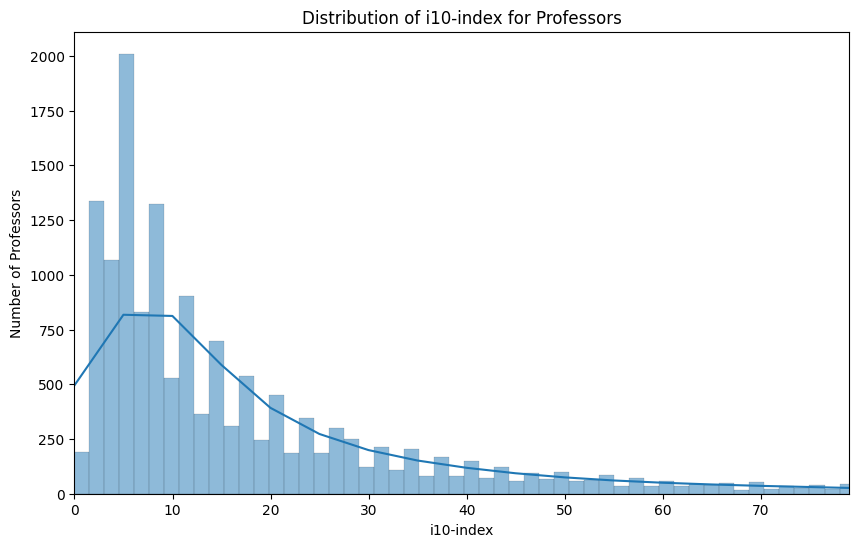

In [29]:
# Plot h-index distribution
plt.figure(figsize=(10, 6))
sns.histplot(professors_df['h_index'], kde=True)
plt.title('Distribution of h-index for Professors')
plt.xlabel('h-index')
plt.ylabel('Number of Professors')
plt.xlim(0, professors_df['h_index'].quantile(0.95))  # Limit x-axis to the 95th percentile
plt.show()

# Plot i10-index distribution
plt.figure(figsize=(10, 6))
sns.histplot(professors_df['i10_index'],  kde=True)
plt.xlim(0, professors_df['i10_index'].quantile(0.95))  # Limit x-axis to the 95th percentile
plt.title('Distribution of i10-index for Professors')
plt.xlabel('i10-index')
plt.ylabel('Number of Professors')
plt.show()


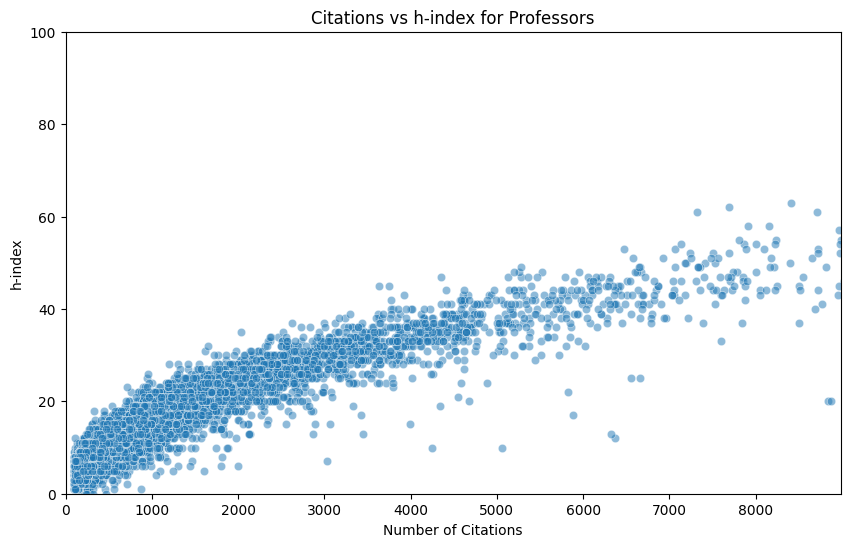

In [30]:
# Scatter plot for citations vs h-index
plt.figure(figsize=(10, 6))
sns.scatterplot(x=professors_df['cited_by'], y=professors_df['h_index'], alpha=0.5)
plt.title('Citations vs h-index for Professors')
plt.xlabel('Number of Citations')
plt.ylabel('h-index')
plt.xlim(0, professors_df['cited_by'].quantile(0.99))  # Limiting x-axis for clarity
plt.ylim(0, 100)
plt.show()


In [31]:
articles['link_ids'] = articles['link_ids_x'].apply(lambda x: x.split(','))
articles_expanded = articles.explode('link_ids')
articles_expanded["link_ids"] = articles_expanded["link_ids"].astype("int64")
merged_df = articles_expanded.merge(professors_df, left_on='link_ids', right_on='id', how='left')

In [33]:
articles_df = pd.read_csv("../../build/final_article.csv", index_col=0)

In [34]:
import pandas as pd
from itertools import combinations
from collections import defaultdict
import folium
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [35]:
# Step 1: Map authors to universities
# Create a mapping from professor names to universities
prof_to_uni = professors_df.set_index('name')['university'].to_dict()

In [36]:
# For each article, map authors to universities
def get_universities(authors):
    universities = set()
    for author in authors.split(','):
        try:
            author_name = professors_df[professors_df["id"] == int(author)]["name"].values[0]
            uni = prof_to_uni.get(author_name)
            if uni:
                universities.add(uni)
        except:
            continue
    return universities

articles_df['universities'] = articles_df['link_ids_x'].apply(get_universities)

In [37]:
# Step 2: Build collaboration pairs and count collaborations
collab_counter = defaultdict(int)

for universities in articles_df['universities']:
    for uni_pair in combinations(universities, 2):
        sorted_pair = tuple(sorted(uni_pair))
        collab_counter[sorted_pair] += 1

# Convert collaboration data to DataFrame
collab_df = pd.DataFrame([
    {'university1': k[0], 'university2': k[1], 'collaborations': v}
    for k, v in collab_counter.items()
])

In [38]:
df1 = collab_df[['university1', 'collaborations']].rename(columns={'university1': 'university'})
df2 = collab_df[['university2', 'collaborations']].rename(columns={'university2': 'university'})

# Concatenate the two DataFrames
df_all = pd.concat([df1, df2], ignore_index=True)

# Group by university and sum collaborations
collab_sum = df_all.groupby('university')['collaborations'].sum().reset_index()

# Sort the results (optional)
collab_sum = collab_sum.sort_values(by='collaborations', ascending=False)
collab_sum_max = int(collab_sum["collaborations"].max())
collab_sum = collab_sum.set_index('university')['collaborations'].to_dict()

In [39]:
n_uni_in_town = {}

for _, row in universities_df.iterrows():
    if row['Town'] in n_uni_in_town:
        n_uni_in_town[row['Town']] += 1
    else:
        n_uni_in_town[row['Town']] = 1

In [40]:

# Step 3: Geocode universities to get their coordinates
geolocator = Nominatim(user_agent="iran_universities")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

def get_lat_lon(town):
    location = geocode(f"{town}, Iran")
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

universities_df[['latitude', 'longitude']] = universities_df.apply(
    lambda row: get_lat_lon(row['Town']), axis=1, result_type='expand'
)

# Remove universities without coordinates
university_coords = universities_df.dropna(subset=['latitude', 'longitude'])

# Create a mapping from university name to coordinates
uni_to_coords = university_coords.set_index('University')[['latitude', 'longitude']].to_dict('index')


RateLimiter caught an error, retrying (0/2 tries). Called with (*('Isfahan, Iran',), **{}).
Traceback (most recent call last):
  File "/home/mmli/coding/googleScholarNetworkAnalysis/.venv/lib/python3.12/site-packages/urllib3/connectionpool.py", line 466, in _make_request
    self._validate_conn(conn)
  File "/home/mmli/coding/googleScholarNetworkAnalysis/.venv/lib/python3.12/site-packages/urllib3/connectionpool.py", line 1095, in _validate_conn
    conn.connect()
  File "/home/mmli/coding/googleScholarNetworkAnalysis/.venv/lib/python3.12/site-packages/urllib3/connection.py", line 652, in connect
    sock_and_verified = _ssl_wrap_socket_and_match_hostname(
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/mmli/coding/googleScholarNetworkAnalysis/.venv/lib/python3.12/site-packages/urllib3/connection.py", line 805, in _ssl_wrap_socket_and_match_hostname
    ssl_sock = ssl_wrap_socket(
               ^^^^^^^^^^^^^^^^
  File "/home/mmli/coding/googleScholarNetworkAn

In [41]:
# Step 4: Plotting the map
# Initialize the map centered on Iran
iran_map = folium.Map(location=[32.4279, 53.6880], zoom_start=5)

# Add university markers
for uni, coords in uni_to_coords.items():
    uni_town = universities_df[universities_df["University"] == uni]["Town"].values[0]
    folium.CircleMarker(
        location=[coords['latitude'], coords['longitude']],
        radius= n_uni_in_town[uni_town] / 2 + 1,
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(iran_map)

# Find the maximum collaborations value for normalization
max_collaborations = collab_df['collaborations'].max()

# Add collaboration lines with colors based on the weight
for _, row in collab_df.iterrows():
    uni1 = row['university1']
    uni2 = row['university2']
    collaborations = row['collaborations']
    
    if uni1 in uni_to_coords and uni2 in uni_to_coords:
        coords1 = uni_to_coords[uni1]
        coords2 = uni_to_coords[uni2]
        
        
        folium.PolyLine(
            locations=[
                [coords1['latitude'], coords1['longitude']],
                [coords2['latitude'], coords2['longitude']]
            ],
            weight=2,  
            color='red',
            opacity= collaborations / max_collaborations,
            smooth_factor=1
        ).add_to(iran_map)

# Save or display the map
iran_map.save('iran_universities_collaboration.html')